In [78]:
#let's get into the real job!
#check whether tensorflow is correctly installed
import tensorflow as tf

In [79]:
print(tf.__version__)

2.0.0


In [80]:
#load data 
import numpy as np
x_train, y_train = np.load("train_x.npy"), np.load("train_y.npy")
x_test, y_test = np.load("test_x.npy"), np.load("test_y.npy")

In [81]:
print(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test))

(19257, 24) (19257, 1) (4815, 24) (4815, 1)


In [82]:
from tensorflow import keras
from tensorflow.keras import layers
#make DNN
def fc():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[24]),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(516, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(1)
  ])
    return model
dnn=fc()

In [83]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [84]:
#Once the model is created, you can config the model with losses and metrics
#with model.compile(), 
#train the model with model.fit(), 
#or use the model to do prediction with model.predict().
dnn.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

In [85]:
dnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 64)                1600      
_________________________________________________________________
dense_51 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_52 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_53 (Dense)             (None, 516)               132612    
_________________________________________________________________
dropout_10 (Dropout)         (None, 516)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 517       
Total params: 176,073
Trainable params: 176,073
Non-trainable params: 0
_______________________________________________

In [86]:
#let's do whether model works okay
example_batch = x_train[0:2]
example_result = dnn.predict(example_batch)

In [87]:
#Let's make callbacks for model saving

import os
os.mkdir("./saved_model/")

In [88]:
save_callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath="./saved_model/model-{epoch:04d}.ckpt", 
    verbose=1, 
    save_weights_only=True,
    period=5)

EPOCHS = 20
history = dnn.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.1, verbose=1, callbacks = [save_callbacks])
tf.keras.models.save_model(dnn, "./saved_model/")

Train on 17331 samples, validate on 1926 samples
Epoch 1/20
17331/17331 [==============================] - 4s 237us/sample - loss: 0.3429 - mse: 0.3429 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2/20
17331/17331 [==============================] - 3s 183us/sample - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 3/20
17331/17331 [==============================] - 3s 184us/sample - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4/20
17331/17331 [==============================] - 3s 184us/sample - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 5/20
17152/17331 [============================>.] - ETA: 0s - loss: 0.0064 - mse: 0.0064
Epoch 00005: saving model to ./saved_model/model-0005.ckpt
17331/17331 [==============================] - 3s 190us/sample - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/20
17331/17331 [==============================] - 3s 188us/sample - loss: 0.0056 - mse: 0.0056 - val

In [89]:
# Now load checkpoint at epoch 10 and save it as dnn2

#define new model dnn2 and compile
dnn2 = fc()
dnn2.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

In [90]:
# load checkpoint
dnn2.load_weights("saved_model/model-0010.ckpt")

In [91]:
loss, acc = dnn2.evaluate(x_test, y_test, verbose =2)

4815/1 - 0s - loss: 0.0013 - mse: 0.0016


In [92]:
# load saved model and retrain
dnn3 = tf.keras.models.load_model("./saved_model/")

In [93]:
# train again!
history2 = dnn3.fit(
  x_train, y_train,
  epochs=10, validation_split = 0.1, verbose=1)

Train on 17331 samples, validate on 1926 samples
Epoch 1/10
17331/17331 [==============================] - 4s 243us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 8.0816e-04 - val_mse: 8.0816e-04
Epoch 2/10
17331/17331 [==============================] - 3s 187us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 7.6497e-04 - val_mse: 7.6497e-04
Epoch 3/10
17331/17331 [==============================] - 3s 190us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 8.1819e-04 - val_mse: 8.1819e-04
Epoch 4/10
17331/17331 [==============================] - 3s 185us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 7.3463e-04 - val_mse: 7.3463e-04
Epoch 5/10
17331/17331 [==============================] - 3s 192us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 7.5951e-04 - val_mse: 7.5951e-04
Epoch 6/10
17331/17331 [==============================] - 3s 187us/sample - loss: 0.0011 - mse: 0.0011 - val_loss: 7.4983e-04 - val_mse: 7.4983e-04
Epoch 7/10
17331/17331 [==============================] - 3s 18

In [96]:
import pandas as pd
hist = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
5,0.001136,0.001136,0.000750,0.000750,5
6,0.001119,0.001119,0.000756,0.000756,6
7,0.001105,0.001105,0.000743,0.000743,7
8,0.001116,0.001116,0.000789,0.000789,8
9,0.001089,0.001089,0.000742,0.000742,9


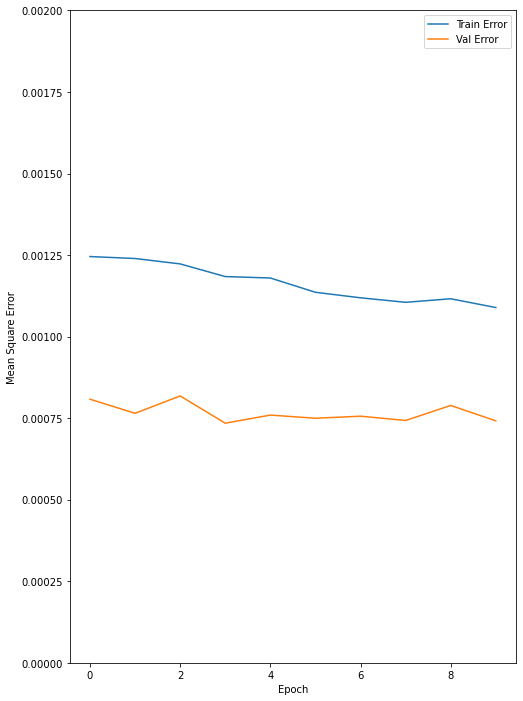

In [97]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.002])
  plt.legend()
  plt.show()

plot_history(history2)

In [98]:
test_predictions = dnn3.predict(x_test).flatten()
print(np.shape(y_test), np.shape(test_predictions))

(4815, 1) (4815,)


In [99]:
#Evaluate with test set
loss,  mse = dnn3.evaluate(x_test, y_test, verbose=2)
pm25_max = 149.0
pm25_min = 1.0
mse = mse*(pm25_max-pm25_min) + pm25_min
print("MSE of testset: {:5.2f} ug/m^3".format(mse))

4815/1 - 0s - loss: 5.1716e-04 - mse: 7.9799e-04
MSE of testset:  1.12 ug/m^3


In [100]:
#de-normalization
for i in range(len(y_test)):
    y_test[i,0] = y_test[i,0]*(pm25_max-pm25_min)+pm25_min
    test_predictions[i] = test_predictions[i]*(pm25_max-pm25_min)+pm25_min

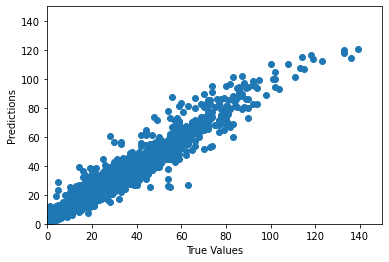

In [101]:
# plot results
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.ylim([0,150])
plt.xlim([0,150])
plt.show()